In [1]:
import pandas as pd # library for data analsysis
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium 
import folium # map rendering libraryt requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe



print('Libraries imported.')

Libraries imported.


In [2]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,Neighbourhood,Avg Price per sqft
0,0,AP SE Board Hyderabad,4445.0
1,1,Ac Guards Hyderabad,6492.0
2,2,Ahmed Nagar Hyderabad,2343.0
3,3,Amberpet Hyderabad,2222.0
4,4,Ameerpet Hyderabad,9628.0


In [3]:
hyderabad_neighbourhoods=df_data_3.dropna(axis=0,how='any')
hyderabad_neighbourhoods.head()


,Unnamed: 0,Neighbourhood,Avg Price per sqft
0,0,AP SE Board Hyderabad,4445.0
1,1,Ac Guards Hyderabad,6492.0
2,2,Ahmed Nagar Hyderabad,2343.0
3,3,Amberpet Hyderabad,2222.0
4,4,Ameerpet Hyderabad,9628.0


In [4]:
hyderabad_neighbourhoods.drop(['Unnamed: 0'],axis=1,inplace = True)
hyderabad_neighbourhoods.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Neighbourhood,Avg Price per sqft
0,AP SE Board Hyderabad,4445.0
1,Ac Guards Hyderabad,6492.0
2,Ahmed Nagar Hyderabad,2343.0
3,Amberpet Hyderabad,2222.0
4,Ameerpet Hyderabad,9628.0


### Locating Google Office on Map ###

In [5]:
office_address = 'Kondapur Village, Hyderabad'

geolocator = Nominatim(user_agent="hyd_explorer")
location = geolocator.geocode(office_address)
office_latitude = location.latitude
office_longitude = location.longitude
print('The geograpical coordinate of Google office are {}, {}.'.format(office_latitude, office_longitude))


The geograpical coordinate of Google office are 17.4587912, 78.3730556.


In [6]:
# create map of Hyderabad showing Google office using latitude and longitude values
map_Hyderabad = folium.Map(location=[office_latitude, office_longitude], zoom_start=12)

# add markers to map
folium.Marker(
    [office_latitude, office_longitude],
    radius=10,
    icon=folium.Icon(color='red'),
    popup='Google'
).add_to(map_Hyderabad)

map_Hyderabad

### Now we shall get the latitude and longitudes of all the neighbourhoods and locate them on the map ###



In [8]:
latitude=[]
longitude =[]

for i in range(len(hyderabad_neighbourhoods)):
    geolocator = Nominatim(user_agent="latlan_explorer")
    location = geolocator.geocode(hyderabad_neighbourhoods.iloc[i,0])
    latitude.append(location.latitude)
    longitude.append(location.longitude)

hyderabad_neighbourhoods['latitude'] = latitude
hyderabad_neighbourhoods['longitude'] = longitude
hyderabad_neighbourhoods.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Neighbourhood,Avg Price per sqft,latitude,longitude
0,AP SE Board Hyderabad,4445.0,17.493930,78.402257
1,Ac Guards Hyderabad,6492.0,17.399877,78.458051
2,Ahmed Nagar Hyderabad,2343.0,17.404066,78.444229
3,Amberpet Hyderabad,2222.0,17.390263,78.516481
4,Ameerpet Hyderabad,9628.0,17.437501,78.448251


In [9]:
# create map of Hyderabad showing Google office using latitude and longitude values
map_Hyderabad = folium.Map(location=[office_latitude, office_longitude], zoom_start=12)

# add markers to map
folium.Marker(
    [office_latitude, office_longitude],
    radius=10,
    icon=folium.Icon(color='red'),
    popup='Google'
).add_to(map_Hyderabad)

for lat, lng, neighborhood in zip(hyderabad_neighbourhoods['latitude'] ,hyderabad_neighbourhoods['longitude'] ,hyderabad_neighbourhoods['Neighbourhood']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=neighborhood,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_Hyderabad)
map_Hyderabad

### Calculate the distance from each neighbourhood to office ###

In [10]:
# Importing the geodesic module from the library 
from geopy.distance import geodesic 

distance_from_office = []

for i in range(len(hyderabad_neighbourhoods)):
    distance_from_office.append(geodesic((office_latitude,office_longitude),(hyderabad_neighbourhoods.iloc[i,2],hyderabad_neighbourhoods.iloc[i,3])).km)

hyderabad_neighbourhoods['Distance in kms'] = distance_from_office
hyderabad_neighbourhoods.rename(columns = {'Neighbourhood':'Neighborhood'}, inplace = True) 
hyderabad_neighbourhoods["Distance in kms"]=hyderabad_neighbourhoods["Distance in kms"].astype(int)
hyderabad_neighbourhoods.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

,Neighborhood,Avg Price per sqft,latitude,longitude,Distance in kms
0,AP SE Board Hyderabad,4445.0,17.493930,78.402257,4
1,Ac Guards Hyderabad,6492.0,17.399877,78.458051,11
2,Ahmed Nagar Hyderabad,2343.0,17.404066,78.444229,9
3,Amberpet Hyderabad,2222.0,17.390263,78.516481,17
4,Ameerpet Hyderabad,9628.0,17.437501,78.448251,8


### Now let us visualise how distance and price vary for each neighbourhood ###

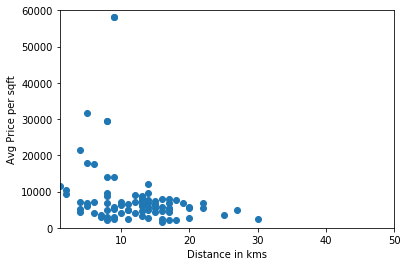

In [11]:
plt.scatter('Distance in kms','Avg Price per sqft',data=hyderabad_neighbourhoods)

plt.ylim(1,60000) 
plt.xlim(1,50)

plt.xlabel('Distance in kms')
plt.ylabel('Avg Price per sqft')

plt.show()

#### From the above graph we don't see much variation of price with distance ####

### Now we use Foursquare API to get the nearest venues to the correspnding Neighborhoods ###

In [12]:
# The code was removed by Watson Studio for sharing.

In [13]:
neighborhood_latitude = hyderabad_neighbourhoods.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = hyderabad_neighbourhoods.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = hyderabad_neighbourhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of AP SE Board Hyderabad are 17.4939302, 78.4022566.


Now we generate a URL to get the venues within 500 meters to our corresponding Neighborhoods

In [14]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [15]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eb70d6b542890001b84aca7'},
 'response': {'headerLocation': 'Hydernagar',
  'headerFullLocation': 'Hydernagar, Hyderabad',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 20,
  'suggestedBounds': {'ne': {'lat': 17.498430204500007,
    'lng': 78.40696601873721},
   'sw': {'lat': 17.489430195499995, 'lng': 78.3975471812628}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51777e62498e1f75b5362d6f',
       'name': 'Paradise Restaurant',
       'location': {'address': 'Kukatpally Housing Board',
        'crossStreet': 'Towards Ushamullapudi Hospital Road.',
        'lat': 17.49336431759921,
        'lng': 78.40415464796615,
        'labeledLatLngs': [{'label': 'display',
          'lat': 17.49336431759921,
          'lng

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Paradise Restaurant,Indian Restaurant,17.493364,78.404155
1,K S Bakery,Bakery,17.494709,78.401117
2,Chaitanya Fine Dining,Food,17.493090,78.402392
3,Cream Stone Concepts,Ice Cream Shop,17.492800,78.404371
4,One Place Hotel,Hotel Bar,17.495338,78.400107


In [18]:
#let us check how many venues are returned
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

20 venues were returned by Foursquare.


In [19]:
#let us create a function which formats the resulted Json and creates a dataframe in the format we need,to proceed further
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)          

In [20]:
hyderabad_venues = getNearbyVenues(names=hyderabad_neighbourhoods['Neighborhood'],
                                       latitudes=hyderabad_neighbourhoods['latitude'],
                                       longitudes=hyderabad_neighbourhoods['longitude']
                                      )

In [21]:
#check number of venues retrieved
print(hyderabad_venues.shape)
hyderabad_venues.head()

(591, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,AP SE Board Hyderabad,17.49393,78.402257,Paradise Restaurant,17.493364,78.404155,Indian Restaurant
1,AP SE Board Hyderabad,17.49393,78.402257,K S Bakery,17.494709,78.401117,Bakery
2,AP SE Board Hyderabad,17.49393,78.402257,Chaitanya Fine Dining,17.493090,78.402392,Food
3,AP SE Board Hyderabad,17.49393,78.402257,Cream Stone Concepts,17.492800,78.404371,Ice Cream Shop
4,AP SE Board Hyderabad,17.49393,78.402257,One Place Hotel,17.495338,78.400107,Hotel Bar


In [22]:
#check number of venues retrieved for each Neighborhood
venue_count=hyderabad_venues.groupby('Neighborhood').count()
venue_count

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
AP SE Board Hyderabad,20,20,20,20,20,20
Ac Guards Hyderabad,4,4,4,4,4,4
Ahmed Nagar Hyderabad,6,6,6,6,6,6
Amberpet Hyderabad,2,2,2,2,2,2
Ameerpet Hyderabad,9,9,9,9,9,9
Ashok Nagar Hyderabad,5,5,5,5,5,5
BK Guda Hyderabad,4,4,4,4,4,4
Balanagar Hyderabad,3,3,3,3,3,3
Banjara Hills Hyderabad,30,30,30,30,30,30


Text(0, 0.5, 'Number of venues')

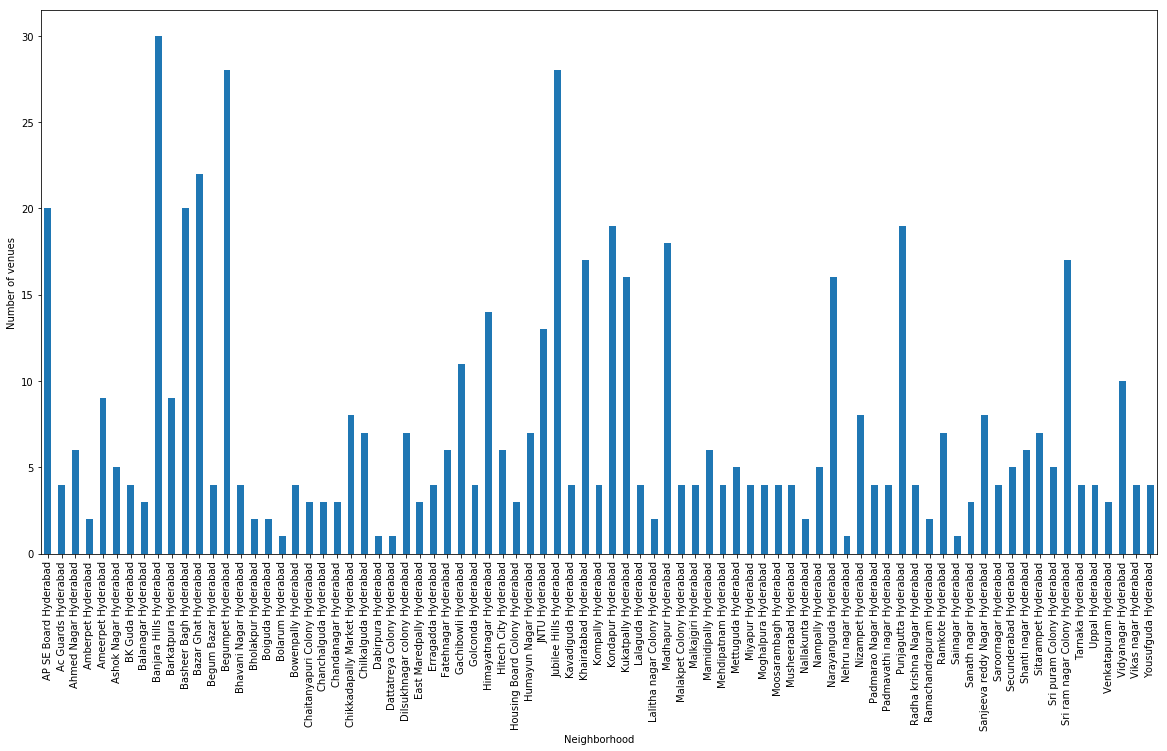

In [23]:
venue_count['Venue'].plot.bar(figsize=(20,10))
plt.ylabel('Number of venues')

In [24]:
# one hot encoding
hyderabad_onehot = pd.get_dummies(hyderabad_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hyderabad_onehot['Neighborhood'] =hyderabad_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hyderabad_onehot.columns[-1]] + list(hyderabad_onehot.columns[:-1])
hyderabad_onehot = hyderabad_onehot[fixed_columns]

hyderabad_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport Food Court,Airport Terminal,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Bistro,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Butcher,Cable Car,Café,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Grocery Store,Gym,Historic Site,Hookah Bar,Hostel,Hotel,Hotel Bar,Hyderabadi Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Jewelry Store,Juice Bar,Lake,Lounge,Market,Mattress Store,Men's Store,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Motel,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,Nightclub,North Indian Restaurant,Optical Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Pub,Restaurant,Sandwich Place,Shopping Mall,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Sports Bar,Stadium,Supermarket,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant
0,AP SE Board Hyderabad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AP SE Board Hyderabad,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AP SE Board Hyderabad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,AP SE Board Hyderabad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,AP SE Board Hyderabad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
hyderabad_grouped = hyderabad_onehot.groupby('Neighborhood').mean().reset_index()
hyderabad_grouped

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport Food Court,Airport Terminal,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Bistro,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Butcher,Cable Car,Café,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Grocery Store,Gym,Historic Site,Hookah Bar,Hostel,Hotel,Hotel Bar,Hyderabadi Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Jewelry Store,Juice Bar,Lake,Lounge,Market,Mattress Store,Men's Store,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Motel,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,Nightclub,North Indian Restaurant,Optical Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Pub,Restaurant,Sandwich Place,Shopping Mall,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Sports Bar,Stadium,Supermarket,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant
0,AP SE Board Hyderabad,0.000000,0.050000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.100000,0.000000,0.000000,0.0,0.0500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.050000,0.000000,0.050000,0.00,0.250000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.050000,0.000000,0.000000,0.000000,0.000000,0.050000,0.050000,0.00,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
1,Ac Guards Hyderabad,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.250000,0.000000,0.500000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
2,Ahmed Nagar Hyderabad,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.166667,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00000

In [26]:
num_top_venues = 10

for hood in hyderabad_grouped['Neighborhood']:
    temp = hyderabad_grouped[hyderabad_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})

In [27]:
#let us define a function to retrieve the most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = hyderabad_grouped['Neighborhood']

for ind in np.arange(hyderabad_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hyderabad_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AP SE Board Hyderabad,Indian Restaurant,Fast Food Restaurant,Bakery,Ice Cream Shop,Snack Place,Breakfast Spot,Pizza Place,Middle Eastern Restaurant,Sandwich Place,Shopping Mall
1,Ac Guards Hyderabad,Hyderabadi Restaurant,Hotel,Bakery,Vegetarian / Vegan Restaurant,Farmers Market,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Deli / Bodega
2,Ahmed Nagar Hyderabad,Snack Place,Café,Vegetarian / Vegan Restaurant,Grocery Store,Furniture / Home Store,Dumpling Restaurant,Coffee Shop,Garden,Comedy Club,Concert Hall
3,Amberpet Hyderabad,Movie Theater,Indian Restaurant,Vegetarian / Vegan Restaurant,Electronics Store,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Deli / Bodega
4,Ameerpet Hyderabad,Indian Restaurant,Vegetarian / Vegan Restaurant,Supermarket,Diner,Electronics Store,Hotel,Sandwich Place,Food Truck,Food Court,Coffee Shop
5,Ashok Nagar Hyderabad,Restaurant,Concert Hall,Brewery,Dessert Shop,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Comedy Club,Convenience Store,Cupcake Shop
6,BK Guda Hyderabad,Indian Restaurant,Café,Bakery,Vegetarian / Vegan Restaurant,Farmers Market,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Deli / Bodega
7,Balanagar Hyderabad,Metro Station,Fish Market,Market,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop
8,Banjara Hills Hyderabad,Coffee Shop,Furniture / Home Store,Café,Indian Restaurant,Lounge,Hookah Bar,Sandwich Place,Deli / Bodega,Bakery,Department Store
9,Barkatpura Hyderabad,Gym,Coffee Shop,Train Station,Motel,Café,Bank,Platform,Dumpling Restaurant,Comedy Club,Concert Hall


In [29]:
neighborhoods_venues_sorted.shape

(81, 11)

### Clustering the neighborhoods using K Mean Algorithm ###

Let us the best value of k by using the elbow method

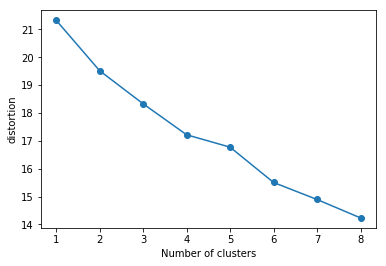

In [30]:
#finding the best K
hyderabad_grouped_clustering = hyderabad_grouped.drop('Neighborhood', 1)
distortions=[]

for i in range(1,9):
    km=KMeans(n_clusters = i,n_init = 20,random_state=10)
    km.fit(hyderabad_grouped_clustering)
    distortions.append(km.inertia_)

plt.plot(range(1,9),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('distortion')
plt.show()


we see that K = 4 would be best value as per Elbow method

In [31]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,n_init=20, random_state=0).fit(hyderabad_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_


array([2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       3, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1], dtype=int32)

In [32]:
# add clustering labels
neighborhoods_venues_sorted['Cluster Labels']=kmeans.labels_.tolist()

hyderabad_merged = hyderabad_neighbourhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
hyderabad_merged = pd.merge(neighborhoods_venues_sorted,hyderabad_merged,on='Neighborhood',how = 'outer')

hyderabad_merged.dropna(how='any',inplace=True)# check the last columns!

In [33]:
hyderabad_merged["Cluster Labels"]=hyderabad_merged["Cluster Labels"].astype(int)
hyderabad_merged


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Avg Price per sqft,latitude,longitude,Distance in kms
0,AP SE Board Hyderabad,Indian Restaurant,Fast Food Restaurant,Bakery,Ice Cream Shop,Snack Place,Breakfast Spot,Pizza Place,Middle Eastern Restaurant,Sandwich Place,Shopping Mall,2,4445.0,17.493930,78.402257,4
1,Ac Guards Hyderabad,Hyderabadi Restaurant,Hotel,Bakery,Vegetarian / Vegan Restaurant,Farmers Market,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Deli / Bodega,1,6492.0,17.399877,78.458051,11
2,Ahmed Nagar Hyderabad,Snack Place,Café,Vegetarian / Vegan Restaurant,Grocery Store,Furniture / Home Store,Dumpling Restaurant,Coffee Shop,Garden,Comedy Club,Concert Hall,0,2343.0,17.404066,78.444229,9
3,Amberpet Hyderabad,Movie Theater,Indian Restaurant,Vegetarian / Vegan Restaurant,Electronics Store,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Deli / Bodega,2,2222.0,17.390263,78.516481,17
4,Ameerpet Hyderabad,Indian Restaurant,Vegetarian / Vegan Restaurant,Supermarket,Diner,Electronics Store,Hotel,Sandwich Place,Food Truck,Food Court,Coffee Shop,2,9628.0,17.437501,78.448251,8
5,Ashok Nagar Hyderabad,Restaurant,Concert Hall,Brewery,Dessert Shop,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Comedy Club,Convenience Store,Cupcake Shop,1,6106.0,17.405826,78.490260,13
6,BK Guda Hyderabad,Indian Restaurant,Café,Bakery,Vegetarian / Vegan Restaurant,Farmers Market,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Deli / Bodega,2,3034.0,17.446628,78.446289,7
7,Balanagar Hyderabad,Metro Station,Fish Market,Market,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,1,6047.0,17.476746,78.422108,5
8,Banjara Hills Hyderabad,Coffee Shop,Furniture / Home Store,Café,Indian Restaurant,Lounge,Hookah Bar,Sandwich Place,Deli / Bodega,Bakery,Department Store,1,29600.0,17.417746,78.439901,8
9,Banjara Hills Hyderabad,Coffee Shop,Furniture / Home Store,Café,Indian Restaurant,Lounge,Hookah Bar,Sandwich Place,Deli / Bodega,Bakery,Department Store,1,29600.0,17.417746,78.439901,8


#### We can see that each Neighbourhood is assigned to its corresponding cluster label ####

### Now let us locate all Neighborhoods on Map with different colors assigned to each cluster ###

In [34]:
# create map
map_clusters = folium.Map(location=[office_latitude, office_longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
 
    
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hyderabad_merged['latitude'], hyderabad_merged['longitude'], hyderabad_merged['Neighborhood'], hyderabad_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
#office pin
label = 'Google'
folium.Marker(
    [office_latitude, office_longitude],
    radius=10,
    popup=label,
    icon=folium.Icon(color='red')
    ).add_to(map_clusters) 
       
map_clusters

### Now we can split out each cluster from Dataframe and analyse how each cluster is differnt from other ###

In [35]:
hyderabad_merged.set_index("Neighborhood",inplace=True)
cluster_1 = hyderabad_merged.loc[hyderabad_merged['Cluster Labels'] == 0]
cluster_1

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Avg Price per sqft,latitude,longitude,Distance in kms
Neighborhood,,,,,,,,,,,,,,,
Ahmed Nagar Hyderabad,Snack Place,Café,Vegetarian / Vegan Restaurant,Grocery Store,Furniture / Home Store,Dumpling Restaurant,Coffee Shop,Garden,Comedy Club,Concert Hall,0,2343.0,17.404066,78.444229,9
Boiguda Hyderabad,Café,Ice Cream Shop,Vegetarian / Vegan Restaurant,Farmers Market,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Deli / Bodega,Department Store,0,8416.0,17.428636,78.496996,13
Bolarum Hyderabad,Café,Vegetarian / Vegan Restaurant,Clothing Store,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Deli / Bodega,Department Store,0,5143.0,17.533399,78.515577,17
East Maredpally Hyderabad,Café,Breakfast Spot,Playground,Vegetarian / Vegan Restaurant,Electronics Store,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Deli / Bodega,0,4451.0,17.424688,78.535987,17
Lalaguda Hyderabad,Fast Food Restaurant,Café,Indian Restaurant,Breakfast Spot,Farmers Market,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Deli / Bodega,0,7820.0,17.440572,78.532148,17
Tarnaka Hyderabad,Café,Food Truck,Indian Restaurant,Breakfast Spot,Vegetarian / Vegan Restaurant,Electronics Store,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,0,6724.0,17.428548,78.537943,17
Vikas nagar Hyderabad,Café,Stadium,Department Store,Playground,Vegetarian / Vegan Restaurant,Electronics Store,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,0,6524.0,17.409192,78.489815,13


In [36]:
cluster_2 = hyderabad_merged.loc[hyderabad_merged['Cluster Labels'] == 1]
cluster_2

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Avg Price per sqft,latitude,longitude,Distance in kms
Neighborhood,,,,,,,,,,,,,,,
Ac Guards Hyderabad,Hyderabadi Restaurant,Hotel,Bakery,Vegetarian / Vegan Restaurant,Farmers Market,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Deli / Bodega,1,6492.0,17.399877,78.458051,11
Ashok Nagar Hyderabad,Restaurant,Concert Hall,Brewery,Dessert Shop,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Comedy Club,Convenience Store,Cupcake Shop,1,6106.0,17.405826,78.490260,13
Balanagar Hyderabad,Metro Station,Fish Market,Market,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,1,6047.0,17.476746,78.422108,5
Banjara Hills Hyderabad,Coffee Shop,Furniture / Home Store,Café,Indian Restaurant,Lounge,Hookah Bar,Sandwich Place,Deli / Bodega,Bakery,Department Store,1,29600.0,17.417746,78.439901,8
Banjara Hills Hyderabad,Coffee Shop,Furniture / Home Store,Café,Indian Restaurant,Lounge,Hookah Bar,Sandwich Place,Deli / Bodega,Bakery,Department Store,1,29600.0,17.417746,78.439901,8
Barkatpura Hyderabad,Gym,Coffee Shop,Train Station,Motel,Café,Bank,Platform,Dumpling Restaurant,Comedy Club,Concert Hall,1,6406.0,17.392612,78.496968,15
Basheer Bagh Hyderabad,Chinese Restaurant,Restaurant,Ice Cream Shop,Food Court,Hookah Bar,Fast Food Restaurant,Indian Restaurant,Jewelry Store,Dessert Shop,Lake,1,7252.0,17.405390,78.477645,12
Bazar Ghat Hyderabad,Fast Food Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Shopping Mall,Electronics Store,Coffee Shop,Clothing Store,Furniture / Home Store,Breakfast Spot,Park,1,3053.0,17.425592,78.451276,9
Begumpet Hyderabad,Clothing Store,Indian Restaurant,Thai Restaurant,Hotel,Metro Station,Bus Stop,Outdoors & Recreation,Bank,Hyderabadi Restaurant,Gym,1,58047.0,17.444020,78.462482,9


In [37]:
cluster_3 = hyderabad_merged.loc[hyderabad_merged['Cluster Labels'] == 2]
cluster_3

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Avg Price per sqft,latitude,longitude,Distance in kms
Neighborhood,,,,,,,,,,,,,,,
AP SE Board Hyderabad,Indian Restaurant,Fast Food Restaurant,Bakery,Ice Cream Shop,Snack Place,Breakfast Spot,Pizza Place,Middle Eastern Restaurant,Sandwich Place,Shopping Mall,2,4445.0,17.493930,78.402257,4
Amberpet Hyderabad,Movie Theater,Indian Restaurant,Vegetarian / Vegan Restaurant,Electronics Store,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Deli / Bodega,2,2222.0,17.390263,78.516481,17
Ameerpet Hyderabad,Indian Restaurant,Vegetarian / Vegan Restaurant,Supermarket,Diner,Electronics Store,Hotel,Sandwich Place,Food Truck,Food Court,Coffee Shop,2,9628.0,17.437501,78.448251,8
BK Guda Hyderabad,Indian Restaurant,Café,Bakery,Vegetarian / Vegan Restaurant,Farmers Market,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Deli / Bodega,2,3034.0,17.446628,78.446289,7
Begum Bazar Hyderabad,Hotel,Food,South Indian Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Electronics Store,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,2,4545.0,17.377123,78.468153,13
Chikkadapally Market Hyderabad,Indian Restaurant,Movie Theater,Asian Restaurant,Breakfast Spot,Vegetarian / Vegan Restaurant,Electronics Store,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,2,6841.0,17.403140,78.495297,14
Dattatreya Colony Hyderabad,Indian Restaurant,Vegetarian / Vegan Restaurant,Farmers Market,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Deli / Bodega,Department Store,2,2780.0,17.354153,78.530878,20
Fatehnagar Hyderabad,Indian Restaurant,Bakery,Pizza Place,Sandwich Place,Juice Bar,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Coffee Shop,Comedy Club,Concert Hall,2,8888.0,17.444908,78.448967,8
Kompally Hyderabad,Indian Restaurant,Gaming Cafe,Vegetarian / Vegan Restaurant,Farmers Market,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Deli / Bodega,2,5482.0,17.544703,78.491842,15


In [38]:
cluster_4 = hyderabad_merged.loc[hyderabad_merged['Cluster Labels'] == 3]
cluster_4

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Avg Price per sqft,latitude,longitude,Distance in kms
Neighborhood,,,,,,,,,,,,,,,
Sainagar Hyderabad,Restaurant,Vegetarian / Vegan Restaurant,Clothing Store,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Deli / Bodega,Department Store,3,6857.0,17.368312,78.561007,22


We observe that each cluster has unique type of Neighbourhoods. Some are far and less price,some far near high price, some has more number of food places nearby etc.

Now as per Employee requirement, we need to check which cluster has gym and Departmental stores nearby.


We observe that Cluster 2 has more number of Deparmental stores,electronic store, gym nearby.

So, as we through the neighbourhoods, we can see that Kondapur has all the venues which the employee requires and also if we observe clearly its the Neighbourhood where his office is located.

By this we can say Kondapur would be the best fit Neighbourhood for Employee.

Again! It completely depends on the employee choice, if he finds the price is high and he can opt for a farther place of less hosue price, like Barkatpura which has Gym, bank and railway station nearby.
